In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, confusion_matrix,classification_report
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import plotly.io as pio
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df4_train = pd.read_csv("Dataset-MobilePrice/df4_train.csv")
df4_test = pd.read_csv("Dataset-MobilePrice/df4_test.csv")

In [3]:
true_num_cols_train= [
    'battery_power',
    'clock_speed',
    'fc',
    'int_memory',
    'mobile_wt',
    'pc',
    'ram',
    'talk_time'
]
true_cat_cols_train = [col for col in df4_train.columns if col not in true_num_cols_train]

In [4]:
for col in true_cat_cols_train:
    df4_train[col] = df4_train[col].astype('category')

In [5]:
cat_cols_train = df4_train.select_dtypes(include='category').columns
num_cols_train = df4_train.select_dtypes(include=['int64', 'float64']).columns

In [6]:
num_cols = [
    'battery_power', 'clock_speed', 'fc', 'int_memory',
    'mobile_wt', 'pc', 'ram', 'talk_time'
]

for col in num_cols:
    df4_train[col] = pd.to_numeric(df4_train[col], errors='coerce')

In [7]:
df4_train.dtypes

battery_power       int64
blue             category
clock_speed       float64
dual_sim         category
fc                  int64
four_g           category
int_memory          int64
mobile_wt           int64
n_cores          category
pc                  int64
ram                 int64
talk_time           int64
three_g          category
touch_screen     category
wifi             category
price_range      category
dtype: object

In [8]:
true_num_cols_test = [
    'battery_power',
    'clock_speed',
    'fc',
    'int_memory',
    'mobile_wt',
    'pc',
    'ram',
    'talk_time'
]

In [9]:
true_cat_cols_test = [col for col in df4_test.columns if col not in true_num_cols_test]

In [10]:
for col in true_cat_cols_test:
    df4_test[col] = df4_test[col].astype('category')

In [11]:
cat_cols_test = list(df4_test.select_dtypes(include=['category']).columns)
num_cols_test = list(df4_test.select_dtypes(include=['int64', 'float64']).columns)

In [13]:
df4_test.dtypes

battery_power       int64
blue             category
clock_speed       float64
dual_sim         category
fc                  int64
four_g           category
int_memory          int64
mobile_wt           int64
n_cores          category
pc                  int64
ram                 int64
talk_time           int64
three_g          category
touch_screen     category
wifi             category
dtype: object

<span style="font-size:24px; color:blue;font-weight:bold" >Modeling</span>

The target variable in this dataset is categorical, indicating that our task is a supervised classification problem. To model the relationship between the input features and the price range, we will experiment with three different machine learning algorithms:
+ Decision Tree: a simple yet powerful model that captures nonlinear relationships and feature interactions.
+ Random Forest: an ensemble of decision trees that improves generalization and reduces overfitting.
+ Support Vector Machine (SVM): a strong classifier that performs well in high‑dimensional spaces and can capture complex decision boundaries.

These models were selected because they complement each other in terms of interpretability, flexibility, and predictive strength, allowing us to compare performance across different modeling approaches



In [21]:
df5_train=df4_train.copy()

In [22]:
target = 'price_range'
feature_cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt', 'pc',
                'ram', 'talk_time', 'blue', 'dual_sim', 'four_g', 'n_cores',
                'three_g', 'touch_screen', 'wifi']

In [23]:
# Normalize
df5_scaled=df5_train.copy()
scaler=MinMaxScaler()
df5_scaled[feature_cols]=scaler.fit_transform(df5_scaled[feature_cols])

In [24]:
df5_scaled.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.900000,0.142857,0.10,0.612774,0.944444,0.0,0.0,1.0,1
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.466667,0.285714,0.30,0.634687,0.277778,1.0,1.0,0.0,2
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.541667,0.571429,0.30,0.627205,0.388889,1.0,1.0,0.0,2
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.425000,0.714286,0.45,0.671566,0.500000,1.0,0.0,0.0,2
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.508333,0.142857,0.70,0.308658,0.722222,1.0,1.0,0.0,1


In [25]:
X = df5_scaled[feature_cols]
y = df5_scaled[target]

<span style="font-size:20px;color:blue;font-weight:bold">Decision Trees (DTs)</span>

In [26]:
# As a first step I would like to find the best test size for decision tree

test_sizes = [0.1, 0.2, 0.3, 0.4]
results = []
for size in test_sizes:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=size, stratify=y, random_state=42
    )
    
    # Basic Decision Tree
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # AUC
    try:
        y_proba = model.predict_proba(X_test)
        roc_auc_val = roc_auc_score(y_test, y_proba, multi_class='ovr')
    except:
        roc_auc_val = None
    
    #metrics
    results.append({
        'test_size': size,
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred, average='weighted'),
        'roc_auc': auc
    })

# results
df_results = pd.DataFrame(results)
print(df_results.sort_values(by='accuracy', ascending=False))

   test_size  accuracy  f1_score                               roc_auc
2        0.3    0.7550  0.752489  <function auc at 0x0000022DB3721EE0>
1        0.2    0.7425  0.742720  <function auc at 0x0000022DB3721EE0>
3        0.4    0.7100  0.710054  <function auc at 0x0000022DB3721EE0>
0        0.1    0.7000  0.700618  <function auc at 0x0000022DB3721EE0>


Based on result and accuracy we chose test_size=0.3

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=42)


In [28]:
# Parameter grid definition
param_grid={'criterion':['gini','entropy'], 
           'max_depth':range(2,10),
           'min_samples_split':range(2,15),
           'min_samples_leaf':range(2,20)}
grid_search=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                         param_grid=param_grid,
                         cv=5,
                         scoring='accuracy',
                         verbose=1,
                         return_train_score=True,
                        n_jobs=-1,
                        error_score='raise')
grid_search.fit(X_train,y_train)
best_model=grid_search.best_estimator_
print("Best Parameters:",grid_search.best_params_)
print("Best CV score: ", grid_search.best_score_)
                        


Fitting 5 folds for each of 3744 candidates, totalling 18720 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 14}
Best CV score:  0.803305171530978


In [29]:
# Parameter grid definition
param_grid={'criterion':['gini','entropy'], 
           'max_depth':range(2,10),
           'min_samples_split':range(2,15),
           'min_samples_leaf':range(2,20)}
grid_search=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                         param_grid=param_grid,
                         cv=10,
                         scoring='accuracy',
                         verbose=1,
                         return_train_score=True,
                        n_jobs=-1,
                        error_score='raise')
grid_search.fit(X_train,y_train)
best_model=grid_search.best_estimator_
print("Best Parameters:",grid_search.best_params_)
print("Best CV score: ", grid_search.best_score_)

Fitting 10 folds for each of 3744 candidates, totalling 37440 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 13}
Best CV score:  0.8068653648509765


In [30]:
# We need to check whether the model is overfitted or not to do that we check train vs test accuracy and also confusion matrix, F1, ROC AUS
# Predict on train and test
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
# F1-score (weighted for multiclass)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
# Confusion matrix
print(" Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred))
# Classification report
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

# ROC AUC 
try:
    y_train_proba = best_model.predict_proba(X_train)
    y_test_proba = best_model.predict_proba(X_test)
    train_auc = roc_auc_score(y_train, y_train_proba, multi_class='ovr')
    test_auc = roc_auc_score(y_test, y_test_proba, multi_class='ovr')
    print(f" Train ROC AUC: {train_auc:.4f}")
    print(f" Test ROC AUC: {test_auc:.4f}")
except:
    print(" ROC AUC not available")
# Summary
print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
print(f"Train F1: {train_f1:.4f}, Test F1: {test_f1:.4f}")

 Confusion Matrix (Test):
[[140  10   0   0]
 [ 16 120  14   0]
 [  0  30  91  29]
 [  0   0  26 124]]
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       150
           1       0.75      0.80      0.77       150
           2       0.69      0.61      0.65       150
           3       0.81      0.83      0.82       150

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.79      0.79      0.79       600

 Train ROC AUC: 0.9665
 Test ROC AUC: 0.9391
Train Accuracy: 0.8476, Test Accuracy: 0.7917
Train F1: 0.8478, Test F1: 0.7888


The accuracy and f1 score of train and test are close meaning the model is not overfitted or underfitted but class (2) does not have a good f1-score and it's being confused with class 1 and class 3.

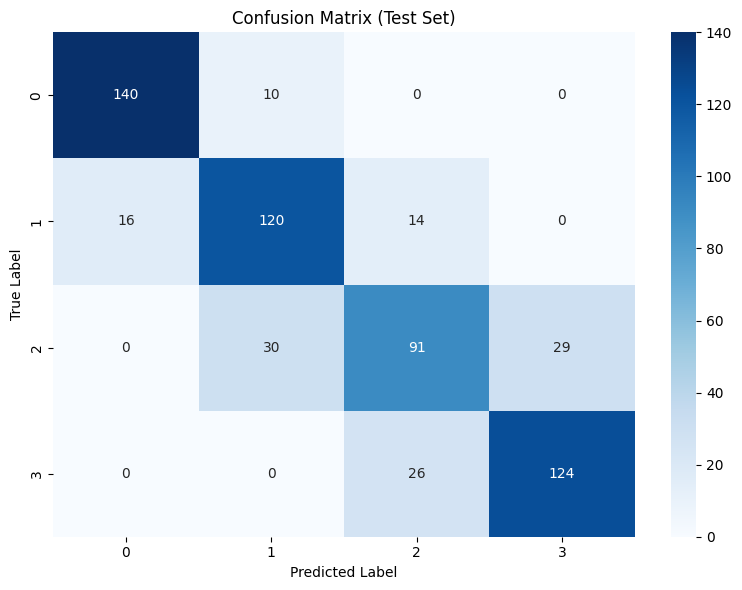

In [31]:
# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_test_pred)
labels = sorted(list(set(y_test)))  
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.savefig("Figures-Mobile Price/Modelling/Confusion Matrix(Test Dataset).png", dpi=300, bbox_inches='tight')
plt.show()


strong class separation and also although f1 score for class 2 was not excellent, the ROC is not bad. In general, I can not rely on this model, although it can be improved. For now, just leave it as it is, and if it was necessary, we need to change it.

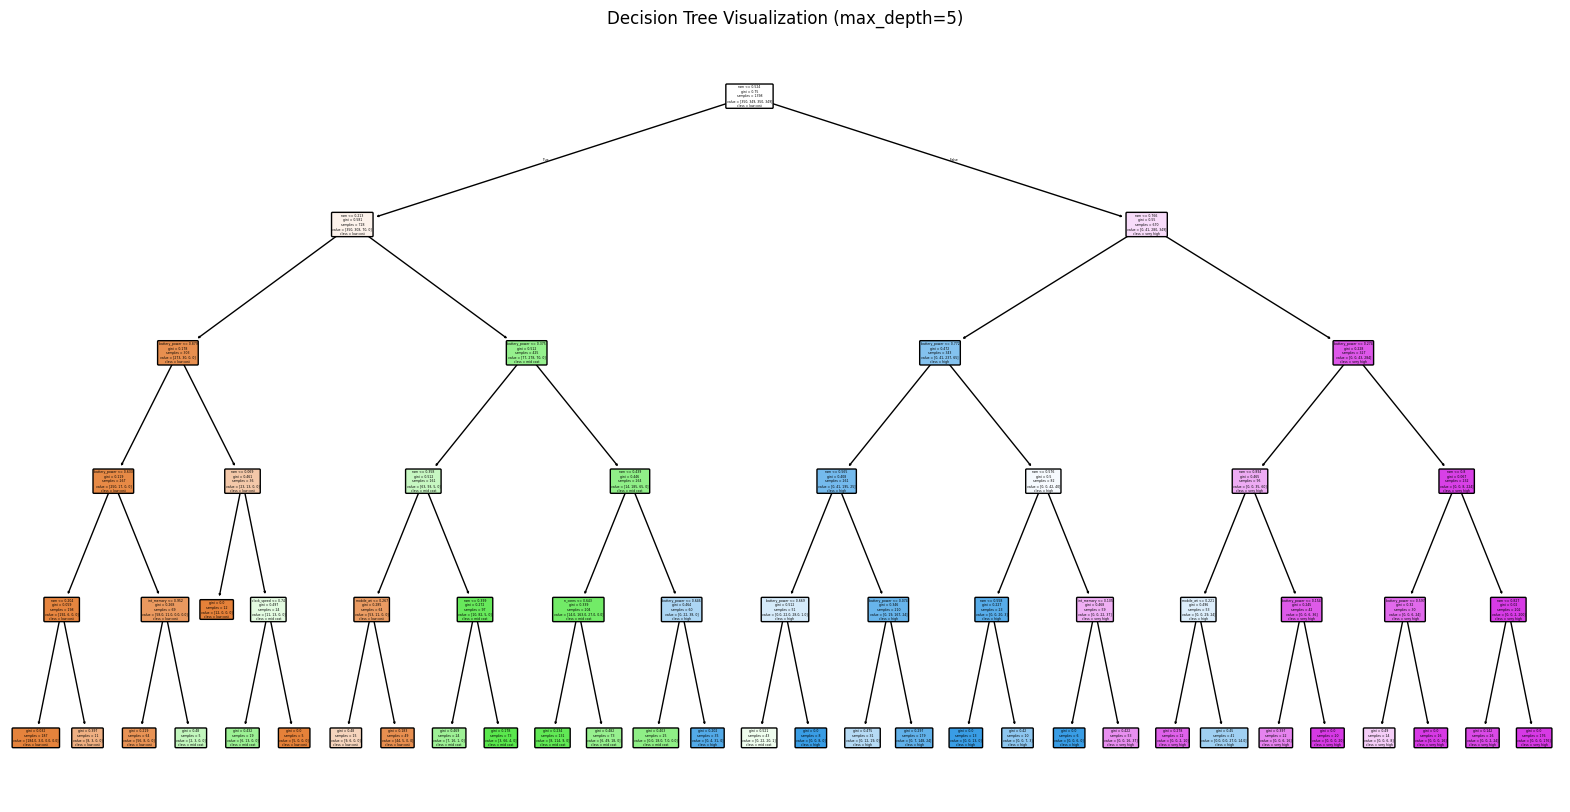

In [32]:
plt.figure(figsize=(20,10))
plot_tree(best_model,
          feature_names=X_train.columns,
          class_names=['low cost','mid cost','high','very high'],
          filled=True,
          rounded=True,
          max_depth=5)
plt.title("Decision Tree Visualization (max_depth=5)")
plt.savefig("Figures-Mobile Price/Modelling/DTs_max_depth_5(Train Dataset).png", dpi=300, bbox_inches='tight')
plt.show()

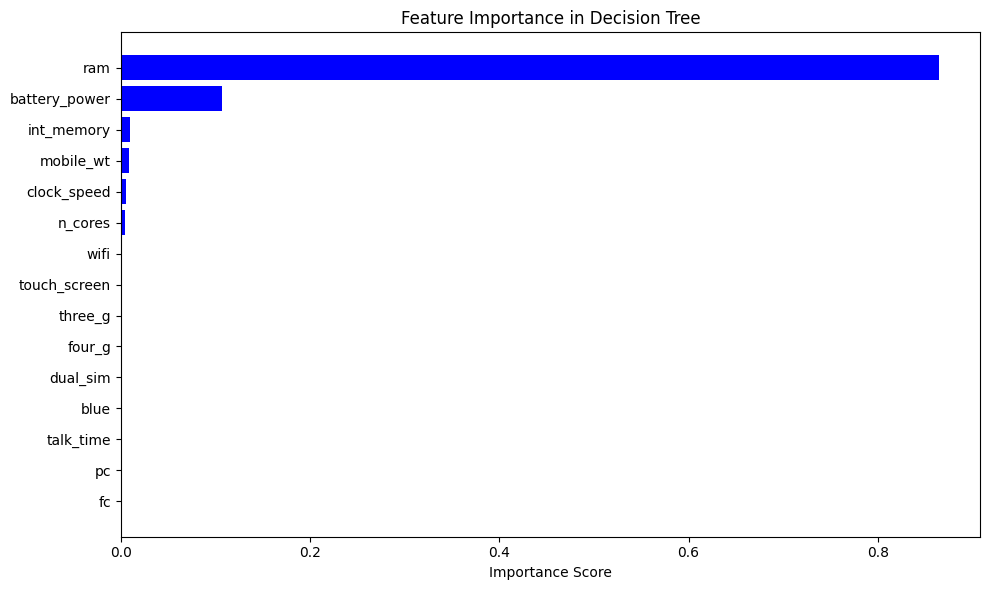

In [33]:
# Extract feature importances
importances = best_model.feature_importances_
features = X_train.columns
# Create DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=True)
# Plot 
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='blue')
plt.xlabel('Importance Score')
plt.title('Feature Importance in Decision Tree')
plt.tight_layout()
plt.savefig("Figures-Mobile Price/Modelling/Feature Importance in DTs.png", dpi=300, bbox_inches='tight')
plt.show()

* RAM has the most influence

<span style="font-size:20px;color:blue;font-weight:bold">Random Forest (RF)</span>

In [34]:
X = df5_scaled[feature_cols]
y = df5_scaled[target].values.reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42,stratify=y )

In [35]:
# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())  # .ravel() flattens y_train
# Predict on test set
y_pred = rf_model.predict(X_test)
# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[93  7  0  0]
 [10 73 17  0]
 [ 0 16 71 13]
 [ 0  0 15 85]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       100
           1       0.76      0.73      0.74       100
           2       0.69      0.71      0.70       100
           3       0.87      0.85      0.86       100

    accuracy                           0.81       400
   macro avg       0.80      0.81      0.80       400
weighted avg       0.80      0.81      0.80       400



max_depth=2: mean=0.694,std=0.026
max_depth=3: mean=0.756,std=0.029
max_depth=4: mean=0.772,std=0.024
max_depth=5: mean=0.783,std=0.033
max_depth=6: mean=0.786,std=0.033
max_depth=7: mean=0.785,std=0.027
max_depth=8: mean=0.787,std=0.027
max_depth=9: mean=0.789,std=0.036
max_depth=10: mean=0.796,std=0.029
max_depth=None: mean=0.793,std=0.030

 Best accuracy: 0.796 at max_depth=10


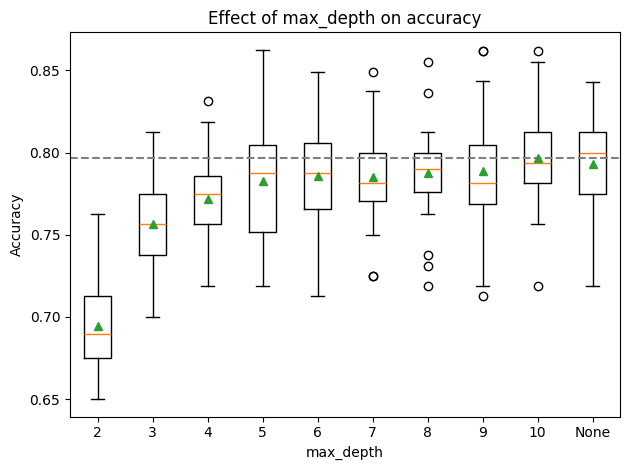

In [36]:
# let's increase the accuracy
def explore_max_depth(X,y):
    depths=list(range(2,11))+[None] #depth from 2 to 10 and plus unlimited
    results,names=[],[]
    max_acc=0
    best_depth=None
    for depth in depths:
        model=RandomForestClassifier(max_depth=depth,random_state=42)
        cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3, random_state=0)
        scores=cross_val_score(model,X,y.ravel(),scoring='accuracy',cv=cv, n_jobs=-1)
        mean_acc=np.mean(scores)
        results.append(scores)
        names.append(str(depth))
        print(f"max_depth={depth}: mean={mean_acc:.3f},std={np.std(scores):.3f}")
        if mean_acc>max_acc:
            max_acc=mean_acc
            best_depth=depth
    print(f"\n Best accuracy: {max_acc:.3f} at max_depth={best_depth}")
    plt.boxplot(results, tick_labels=names,showmeans=True)
    plt.axhline(y=max_acc, color='gray',linestyle='--',label=f'Max_accuracy={max_acc:.3f}')
    plt.title("Effect of max_depth on accuracy")
    plt.xlabel("max_depth")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.savefig("Figures-Mobile Price/Modelling/Max_depth in RF.png", dpi=300, bbox_inches='tight')
    plt.show()
explore_max_depth(X_train,y_train)

+ Max_depth=7,8 have the most accuracy we continue to find the best n_estimator(the numebrs of trees) then we can find the best model based on parameters

n_estimators=10, mean=0.754
n_estimators=50, mean=0.793
n_estimators=100, mean=0.793
n_estimators=200, mean=0.794
n_estimators=300, mean=0.795
n_estimators=500, mean=0.798

 Best Accuracy: 0.798 at n_estimators=500


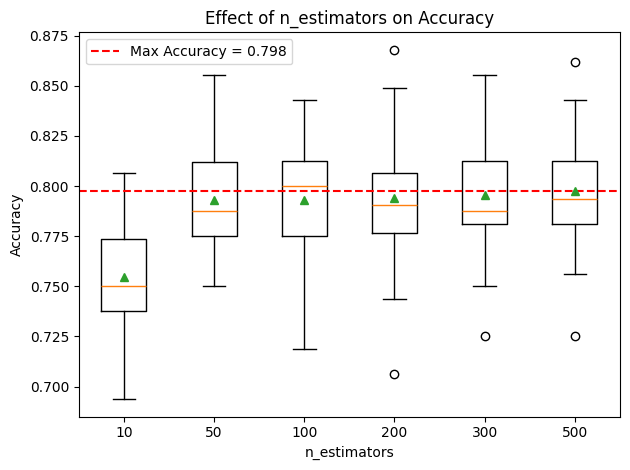

In [37]:
def explore_n_estimators(X, y):
    n_values = [10, 50, 100, 200, 300, 500]
    results, names = [], []
    max_acc = 0
    best_n = None

    for n in n_values:
        model = RandomForestClassifier(n_estimators=n, random_state=42)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
        scores = cross_val_score(model, X, y.ravel(), scoring='accuracy', cv=cv, n_jobs=-1)
        mean_acc = np.mean(scores)
        results.append(scores)
        names.append(str(n))
        print(f"n_estimators={n}, mean={mean_acc:.3f}")

        if mean_acc > max_acc:
            max_acc = mean_acc
            best_n = n

    print(f"\n Best Accuracy: {max_acc:.3f} at n_estimators={best_n}")

    plt.boxplot(results, tick_labels=names, showmeans=True)
    plt.axhline(y=max_acc, color='red', linestyle='--', label=f'Max Accuracy = {max_acc:.3f}')
    plt.title("Effect of n_estimators on Accuracy")
    plt.xlabel("n_estimators")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.savefig("Figures-Mobile Price/Modelling/n_estimators in RF.png", dpi=300, bbox_inches='tight')
    plt.show()

# Run it
explore_n_estimators(X_train, y_train)

* n_estimator=100,200,300 have the best accuracy we continue finding max_feature in the same way

max_features=3, mean=0.793
max_features=5, mean=0.800
max_features=7, mean=0.805
max_features=9, mean=0.804
max_features=sqrt, mean=0.793
max_features=log2, mean=0.793

 Best Accuracy: 0.805 at max_features=7


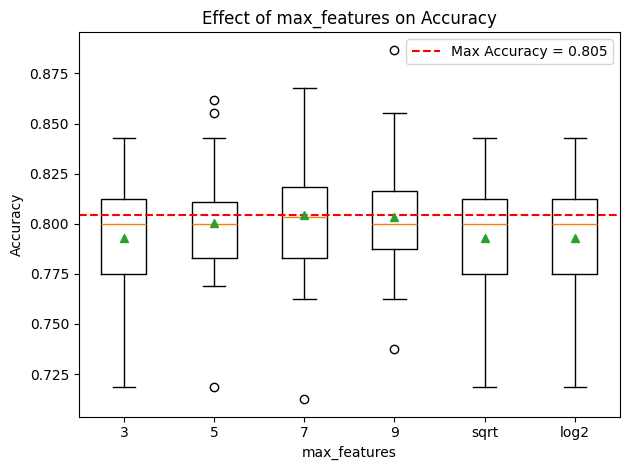

In [38]:
def explore_n_estimators(X, y):
    feature_values=[3,5,7,9,'sqrt','log2']
    results, names = [], []
    max_acc = 0
    best_n = None

    for f in feature_values:
        model = RandomForestClassifier(max_features=f, random_state=42)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
        scores = cross_val_score(model, X, y.ravel(), scoring='accuracy', cv=cv, n_jobs=-1)
        mean_acc = np.mean(scores)
        results.append(scores)
        names.append(str(f))
        print(f"max_features={f}, mean={mean_acc:.3f}")

        if mean_acc > max_acc:
            max_acc = mean_acc
            best_f = f

    print(f"\n Best Accuracy: {max_acc:.3f} at max_features={best_f}")

    plt.boxplot(results, tick_labels=names, showmeans=True)
    plt.axhline(y=max_acc, color='red', linestyle='--', label=f'Max Accuracy = {max_acc:.3f}')
    plt.title("Effect of max_features on Accuracy")
    plt.xlabel("max_features")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.savefig("Figures-Mobile Price/Modelling/max_features in RF.png", dpi=300, bbox_inches='tight')
    plt.show()

# Run it
explore_n_estimators(X_train, y_train)

max_samples=0.3, mean=0.790
max_samples=0.5, mean=0.792
max_samples=0.7, mean=0.793
max_samples=0.9, mean=0.793
max_samples=1.0, mean=0.793

 Best Accuracy: 0.793 at max_samples=None


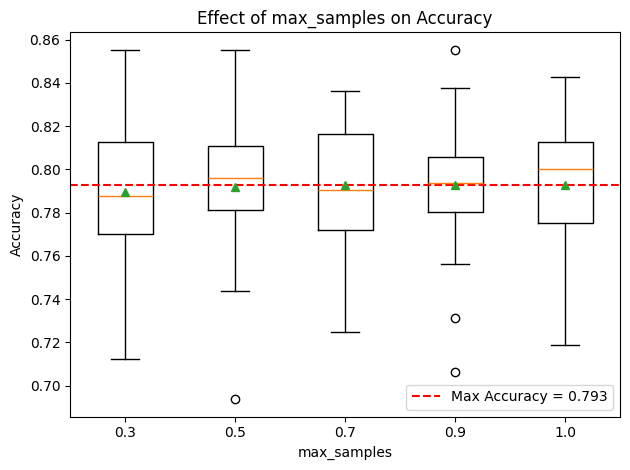

In [39]:
def explore_n_estimators(X, y):
    sample_values=[0.3,0.5,0.7,0.9,1.0]
    results, names = [], []
    max_acc = 0
    best_s = None

    for s in sample_values:
        model = RandomForestClassifier(max_samples=s, random_state=42)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
        scores = cross_val_score(model, X, y.ravel(), scoring='accuracy', cv=cv, n_jobs=-1)
        mean_acc = np.mean(scores)
        results.append(scores)
        names.append(str(s))
        print(f"max_samples={s}, mean={mean_acc:.3f}")

        if mean_acc > max_acc:
            max_acc = mean_acc
            best_f = s

    print(f"\n Best Accuracy: {max_acc:.3f} at max_samples={best_s}")

    plt.boxplot(results, tick_labels=names, showmeans=True)
    plt.axhline(y=max_acc, color='red', linestyle='--', label=f'Max Accuracy = {max_acc:.3f}')
    plt.title("Effect of max_samples on Accuracy")
    plt.xlabel("max_samples")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.savefig("Figures-Mobile Price/Modelling/max_samples in RF.png", dpi=300, bbox_inches='tight')
    plt.show()

# Run it
explore_n_estimators(X_train, y_train)

By finding which values of the parameter give us the best accuracy we can decrease run time in the final model

In [40]:
#Pepline defintion
rf_pipe = Pipeline([
    ('RF', RandomForestClassifier(random_state=42))
])

# Grid of parameters chosen based on values above
grid_param = {
    "RF__criterion": ["gini", "entropy","log_loss"], 
    "RF__max_depth": [8, 9],
    "RF__n_estimators": [200, 300],
    "RF__max_features": [5,7]
    # max_samples left as default (None)
}

# Cross-validation strategy
cv = KFold(n_splits=10, shuffle=True, random_state=42) 
# Grid search
grid_search = GridSearchCV(
    estimator=rf_pipe,
    param_grid=grid_param,
    cv=cv,
    n_jobs=-1,
    scoring='accuracy'
)

# Fit on training data
grid_search.fit(X_train, y_train.ravel())
# Results
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)
# Test evaluation
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC and AUC
if hasattr(best_rf, "predict_proba"):
    try:
        y_proba = best_rf.predict_proba(X_test)
        auc_score = roc_auc_score(y_test, y_proba, multi_class='ovr')
        print("\nROC AUC Score:", auc_score)
    except Exception as e:
        print("\nAUC could not be computed:", e)

Best Parameters: {'RF__criterion': 'gini', 'RF__max_depth': 8, 'RF__max_features': 5, 'RF__n_estimators': 200}
Best CV Accuracy: 0.810377358490566

Test Accuracy: 0.83

Confusion Matrix:
 [[95  5  0  0]
 [10 74 16  0]
 [ 0 14 74 12]
 [ 0  0 11 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       100
           1       0.80      0.74      0.77       100
           2       0.73      0.74      0.74       100
           3       0.88      0.89      0.89       100

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400


ROC AUC Score: 0.9580916666666667


I have tried to change parameter but the accuracy does not change significantly and although the accuracy must have been better but we continue with this model.

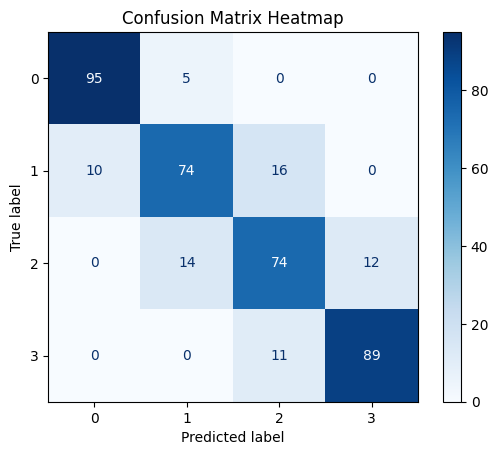

In [41]:
# let's plot the final model accuracy
# Confusion Matrix Heatmap
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.savefig("Figures-Mobile Price/Modelling/cm heatmap (test dataset).png", dpi=300, bbox_inches='tight')
plt.show()


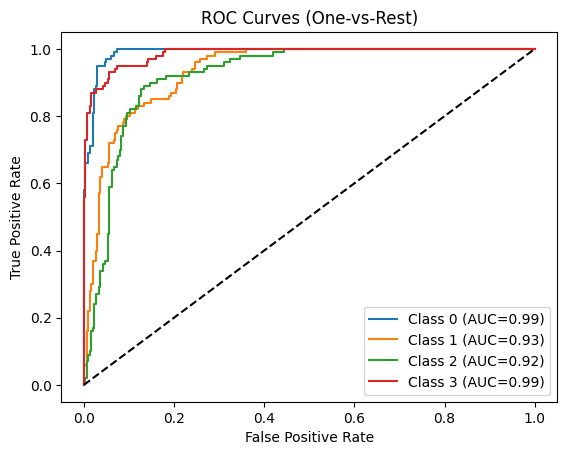

In [42]:
# ROC Curves (One-vs-Rest)
y_bin = label_binarize(y_test, classes=[0,1,2,3])
y_proba = best_rf.predict_proba(X_test)
for i in range(y_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC={auc(fpr,tpr):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig("Figures-Mobile Price/Modelling/ROC Curves (test dataset).png", dpi=300, bbox_inches='tight')
plt.show()

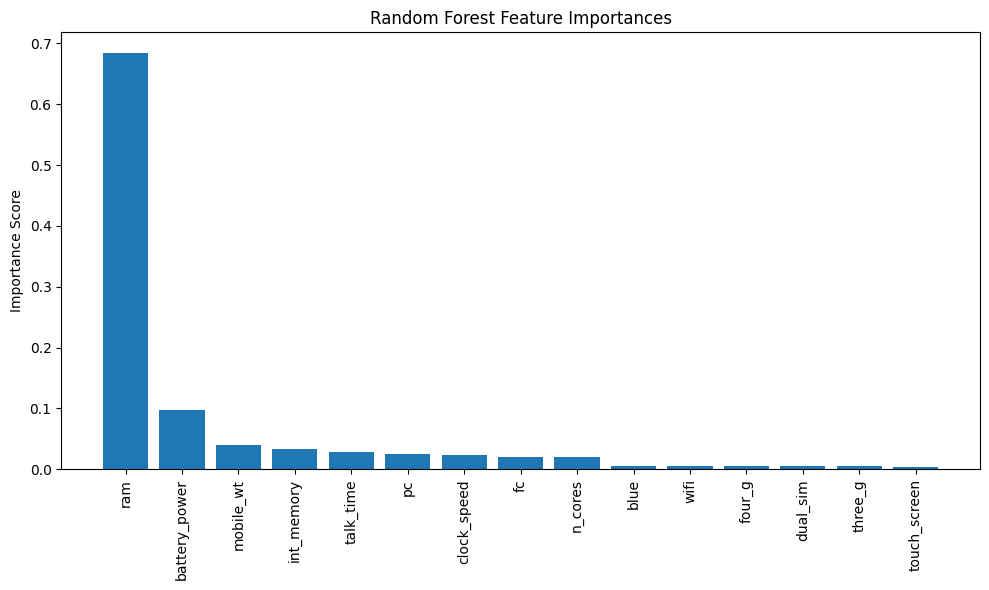

In [43]:

#feature importance
importances = best_rf.named_steps['RF'].feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns 

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.ylabel("Importance Score")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.savefig("Figures-Mobile Price/Modelling/RF feature importance.png", dpi=300, bbox_inches='tight')
plt.show()

+ following we check that the model is not overfitted

In [44]:
train_acc = accuracy_score(y_train, best_rf.predict(X_train))
test_acc = accuracy_score(y_test, best_rf.predict(X_test))

print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Training Accuracy: 0.9493116395494368
Test Accuracy: 0.83


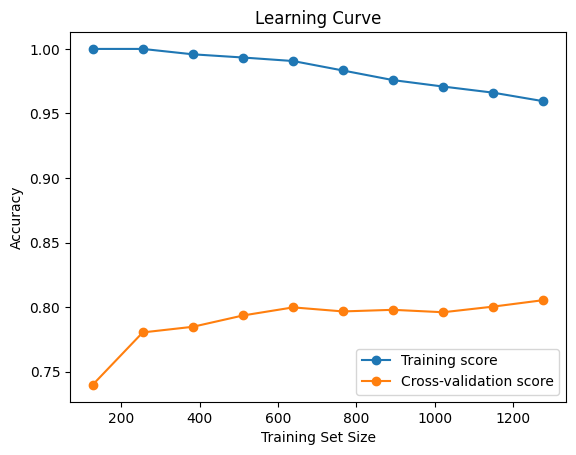

In [45]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(
    best_rf.named_steps['RF'], X_train, y_train.ravel(),
    cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_mean, 'o-', label="Training score")
plt.plot(train_sizes, val_mean, 'o-', label="Cross-validation score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.savefig("Figures-Mobile Price/Modelling/Learning Curve.png", dpi=300, bbox_inches='tight')
plt.show()

X-> that is a red flag, meaning the model memorized the data, we continue to find a better model

I changed the values of parameters manually, and this model had the best accuracy I observed, and the model is not overfitted.

In [46]:
# Define base model
rf = RandomForestClassifier(random_state=42)

# Parameter distributions (slimmed down for speed)
param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 6, 7, 8],                # shallower trees
    "n_estimators": [50, 100, 200],           # number of trees
    "max_features": ['sqrt', 'log2'],         # fewer features per split
    "min_samples_split": [10, 15, 20],        # avoid tiny splits
    "min_samples_leaf": [5, 10],              # require more samples per leaf
    "class_weight": [None, 'balanced']        # we know the data's already balanced but no harm
}

# Cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)  # 3-fold for speed
# Randomized search (sample 40 random combos instead of all)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=40,
    cv=cv,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)

# Fit on training data
random_search.fit(X_train, y_train.ravel())
# Best model
best_rf = random_search.best_estimator_
# Evaluate
y_pred = best_rf.predict(X_test)
print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

# Training and test accuracy
train_acc = accuracy_score(y_train, best_rf.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
print("\nTraining Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

# Confusion matrix and classification report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC AUC
if hasattr(best_rf, "predict_proba"):
    try:
        y_proba = best_rf.predict_proba(X_test)
        auc_score = roc_auc_score(y_test, y_proba, multi_class='ovr')
        print("\nROC AUC Score:", auc_score)
    except Exception as e:
        print("\nAUC could not be computed:", e)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'gini', 'class_weight': 'balanced'}
Best CV Accuracy: 0.7909772084996732

Training Accuracy: 0.8804755944931164
Test Accuracy: 0.795

Confusion Matrix:
 [[95  5  0  0]
 [13 70 17  0]
 [ 0 21 64 15]
 [ 0  0 11 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       100
           1       0.73      0.70      0.71       100
           2       0.70      0.64      0.67       100
           3       0.86      0.89      0.87       100

    accuracy                           0.80       400
   macro avg       0.79      0.80      0.79       400
weighted avg       0.79      0.80      0.79       400


ROC AUC Score: 0.9451916666666667


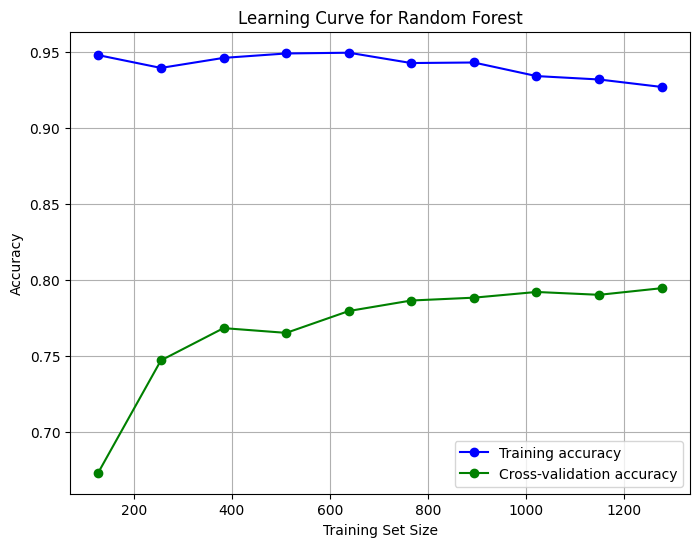

In [47]:
rf = RandomForestClassifier(
    criterion='entropy',
    max_depth=8,
    n_estimators=200,
    max_features='log2',
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=rf,
    X=X_train,
    y=y_train.ravel(),
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training accuracy")
plt.plot(train_sizes, val_mean, 'o-', color="green", label="Cross-validation accuracy")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for Random Forest")
plt.legend(loc="best")
plt.grid(True)
plt.show()

We trained and tuned a Random Forest classifier to predict the target variable. To evaluate whether the model was overfitting, we compared the training accuracy, test accuracy, and cross-validation accuracy, and plotted a learning curve.
1. Accuracy Comparison
- Training Accuracy: around 0.89
- Test Accuracy: around 0.78
- Cross‑Validation Accuracy: around 0.79
The training accuracy is higher than the test accuracy, which suggests some degree of overfitting. However, the gap (~11%) is smaller than in earlier runs (where the gap was ~20%). This indicates that the regularization steps we applied (limiting tree depth, increasing minimum samples per split/leaf, balancing class weights) reduced overfitting.
2. Learning Curve
The learning curve shows:
- Training accuracy remains high and stable across different training sizes.
- Cross‑validation accuracy starts lower but improves as training size increases, stabilizing around ~0.80.
This pattern suggests that the model generalizes reasonably well; however, a persistent gap remains between training and validation performance. That gap reflects mild overfitting.
3. Interpretation
- The model is not catastrophically overfitting anymore.
- It has reached a performance plateau around ~78–80% accuracy.
- The limitation is likely due to the dataset’s complexity and feature representation, not just the Random Forest hyperparameters.



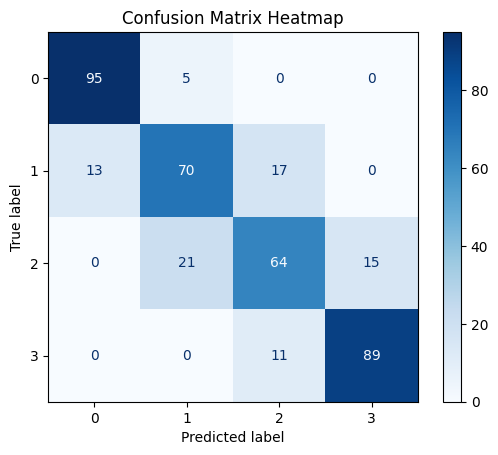

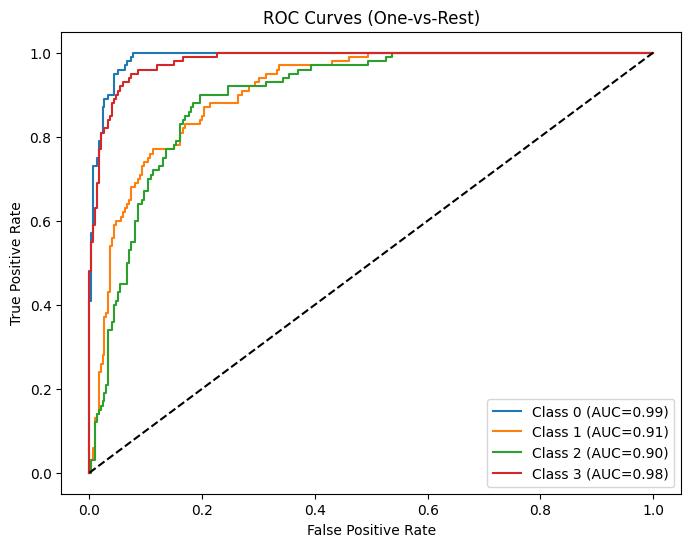

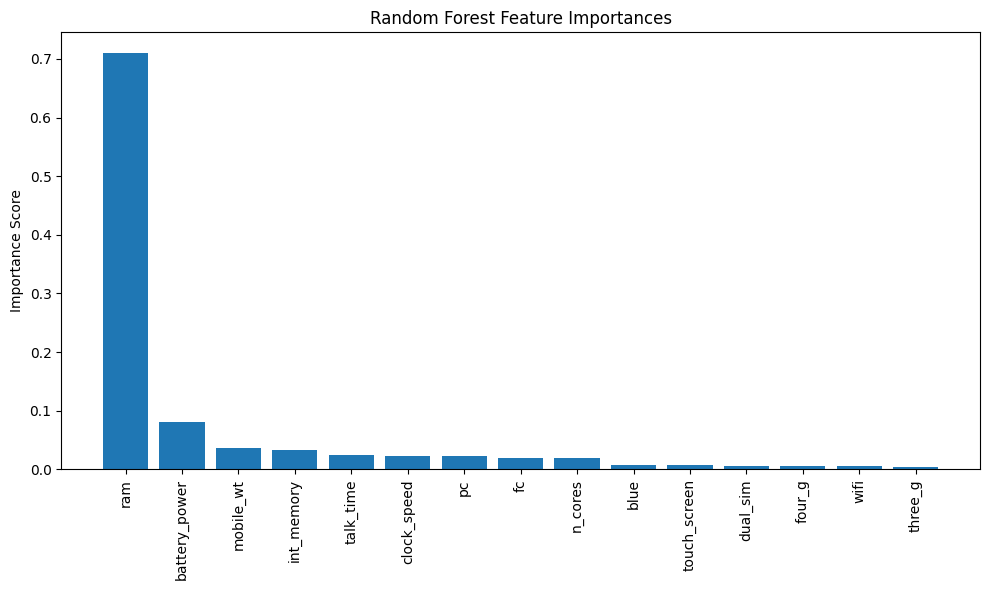

In [48]:
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.show()
# Binarize the labels for multi-class ROC
y_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
y_proba = best_rf.predict_proba(X_test)
plt.figure(figsize=(8,6))
for i in range(y_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC={roc_auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
#feature importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.ylabel("Importance Score")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

<span style="font-size:20px;color:blue;font-weight:bold"> Support Vector Machines (SVM)</span>

In [49]:
X = df5_scaled[feature_cols]
y = df5_scaled[target].values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=42,stratify=y )

In [50]:
#starting with linear kernel
svm_linear=SVC(kernel='linear', C=1,probability=True, random_state=42)
svm_linear.fit(X_train,y_train.ravel())
y_pred_train=svm_linear.predict(X_train)
y_pred_test=svm_linear.predict(X_test)
print("Training Accuracy: ", accuracy_score(y_train,y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test,y_pred_test))


Training Accuracy:  0.8304721030042919
Test Accuracy:  0.8233333333333334


In [51]:
print("\nConfusion Matrix: \n", confusion_matrix(y_test,y_pred_test))
print("\nClassification Report:\n", classification_report(y_test,y_pred_test))


Confusion Matrix: 
 [[144   6   0   0]
 [ 18 111  21   0]
 [  0  17 111  22]
 [  0   0  22 128]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       150
           1       0.83      0.74      0.78       150
           2       0.72      0.74      0.73       150
           3       0.85      0.85      0.85       150

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



In [52]:
# RBF kernel
svm_rbf=SVC(kernel='rbf',C=1, gamma='scale',probability=True, random_state=42)
svm_rbf.fit(X_train,y_train.ravel())
y_pred_train_rbf=svm_rbf.predict(X_train)
y_pred_test_rbf=svm_rbf.predict(X_test)
print("Training Accuracy (RBF): ", accuracy_score(y_train,y_pred_train_rbf))
print("Testing Accuracy (RBF): ", accuracy_score(y_test,y_pred_test_rbf))


Training Accuracy (RBF):  0.8927038626609443
Testing Accuracy (RBF):  0.7866666666666666


In [53]:
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred_test_rbf))
print("Classification Report: \n", classification_report(y_test,y_pred_test_rbf))

Confusion Matrix: 
 [[133  17   0   0]
 [ 21 107  22   0]
 [  0  23 108  19]
 [  0   0  26 124]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       150
           1       0.73      0.71      0.72       150
           2       0.69      0.72      0.71       150
           3       0.87      0.83      0.85       150

    accuracy                           0.79       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.79      0.79      0.79       600



In [54]:
scores=cross_val_score(SVC(kernel='linear', C=1),X,y,cv=5)
print("Linear CV Accuracy: ",scores.mean())
scores=cross_val_score(SVC(kernel='rbf',C=1,gamma='scale'),X,y,cv=5)
print("RBF CV Accuracy: ", scores.mean())

Linear CV Accuracy:  0.8223107769423559
RBF CV Accuracy:  0.7722669172932332


Since linear kernel has better accuracy we try to tune this linear kernel

In [55]:
# Building Pipeline
pipe=Pipeline([('scaler',MinMaxScaler()),('clf',SVC(kernel='linear',probability=True,random_state=42))])
param_grid={'clf__C':[0.01,0.1,1,10,100]}
grid=GridSearchCV(estimator=pipe,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid.fit(X_train,y_train)
best_linear=grid.best_estimator_
print("Best Parameters: ", grid.best_params_)
print("Best CV Score: ", grid.best_score_)


Best Parameters:  {'clf__C': 1}
Best CV Score:  0.8154403481822836


In [56]:
y_pred=best_linear.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test,y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Test Accuracy:  0.8233333333333334

Confusion Matrix: 
 [[144   6   0   0]
 [ 18 111  21   0]
 [  0  17 111  22]
 [  0   0  22 128]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       150
           1       0.83      0.74      0.78       150
           2       0.72      0.74      0.73       150
           3       0.85      0.85      0.85       150

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



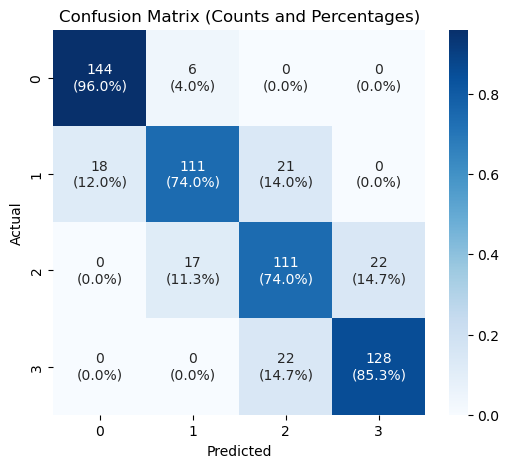

In [431]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Normalize by row 
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# annotation labels with both count and percentage
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        count = cm[i, j]
        percent = cm_normalized[i, j] * 100
        annot[i, j] = f"{count}\n({percent:.1f}%)"
# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm_normalized, annot=annot, fmt='', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix (Counts and Percentages)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The model has a bit of difficulty separating class 2 from classes 1 and 3. In the other model, we also observed the same behavior

In [57]:
print("Training Accuracy:", best_linear.score(X_train, y_train))
print("Test Accuracy:", best_linear.score(X_test, y_test))

Training Accuracy: 0.8304721030042919
Test Accuracy: 0.8233333333333334


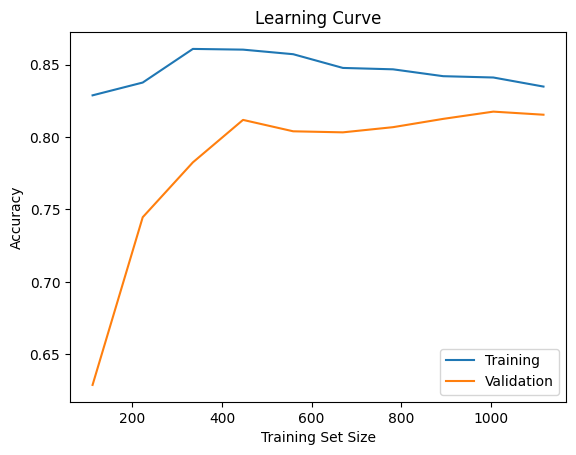

In [58]:
train_sizes, train_scores, val_scores = learning_curve(
    best_linear, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training")
plt.plot(train_sizes, val_scores.mean(axis=1), label="Validation")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve")
plt.show()

The model is not overfitted

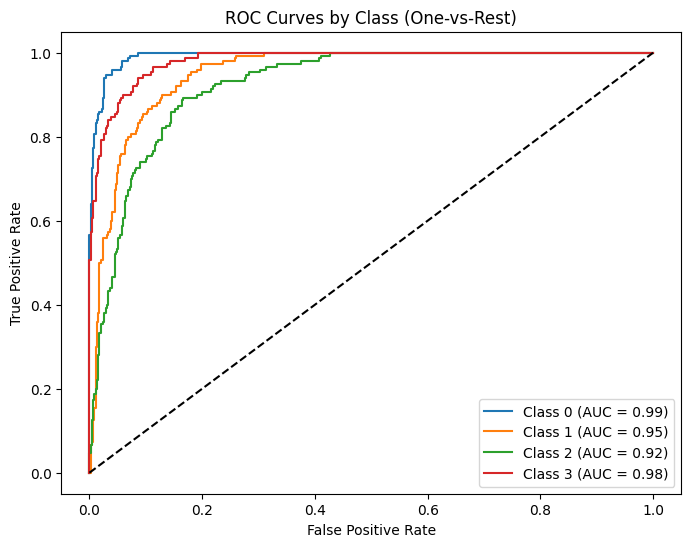

In [59]:
# Predict probabilities for test set
y_prob = best_linear.predict_proba(X_test)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
plt.figure(figsize=(8,6))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")
# Plot diagonal line for random guessing
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curves by Class (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

ok

## This dataset is complex, and the accuracy does not increase beyond 82%. Although the Random Forest model showed slightly higher accuracy, it was not stable. Therefore, we selected SVM as the final model

<span style="font-size:24px;color:magenta;font-weight:bold"> Final Visualization</span>

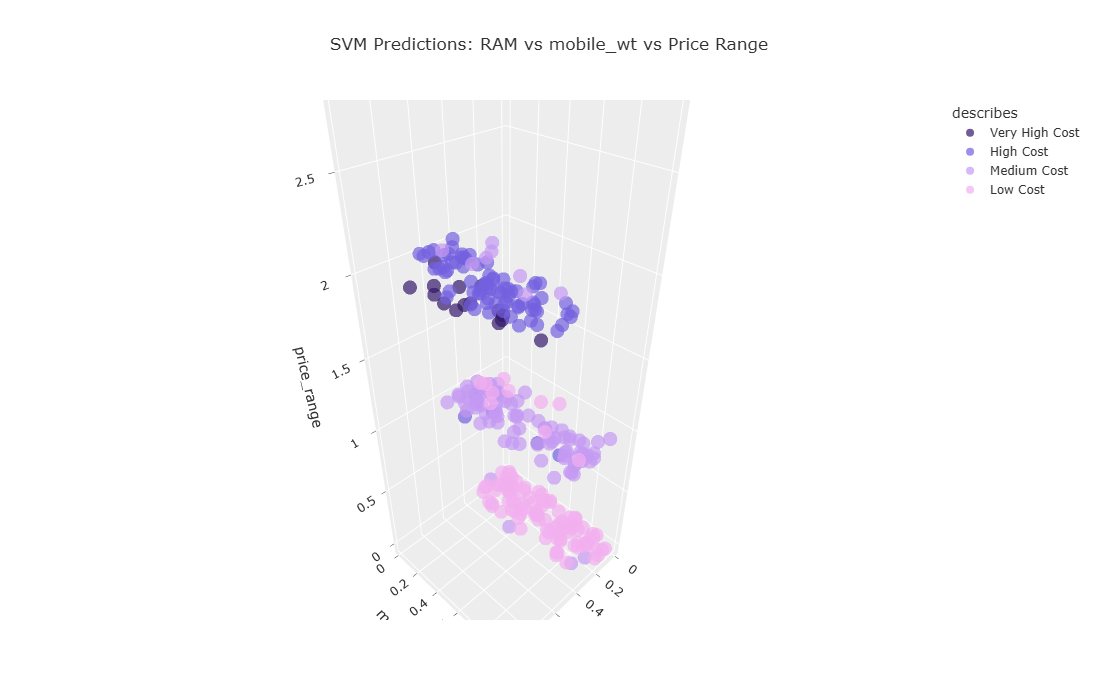

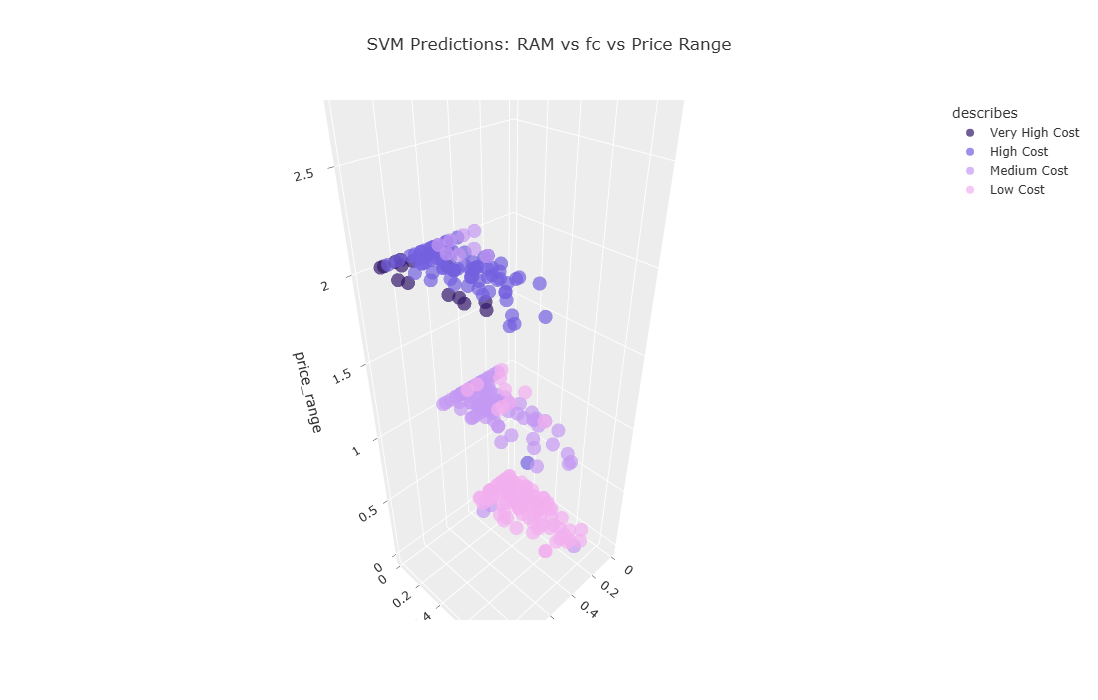

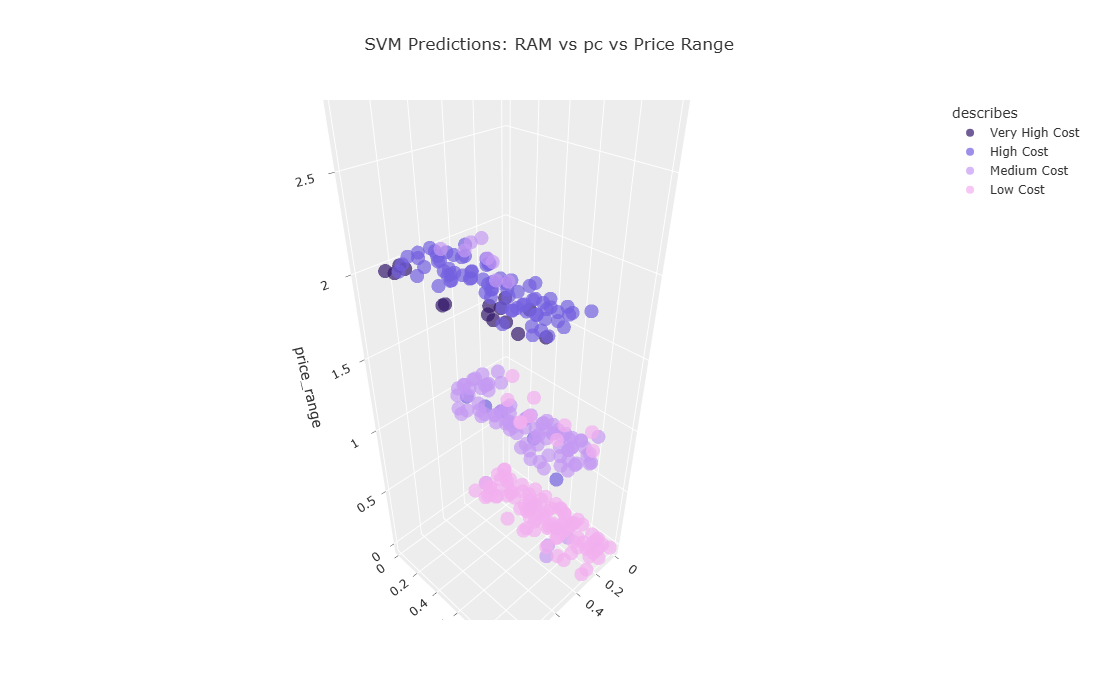

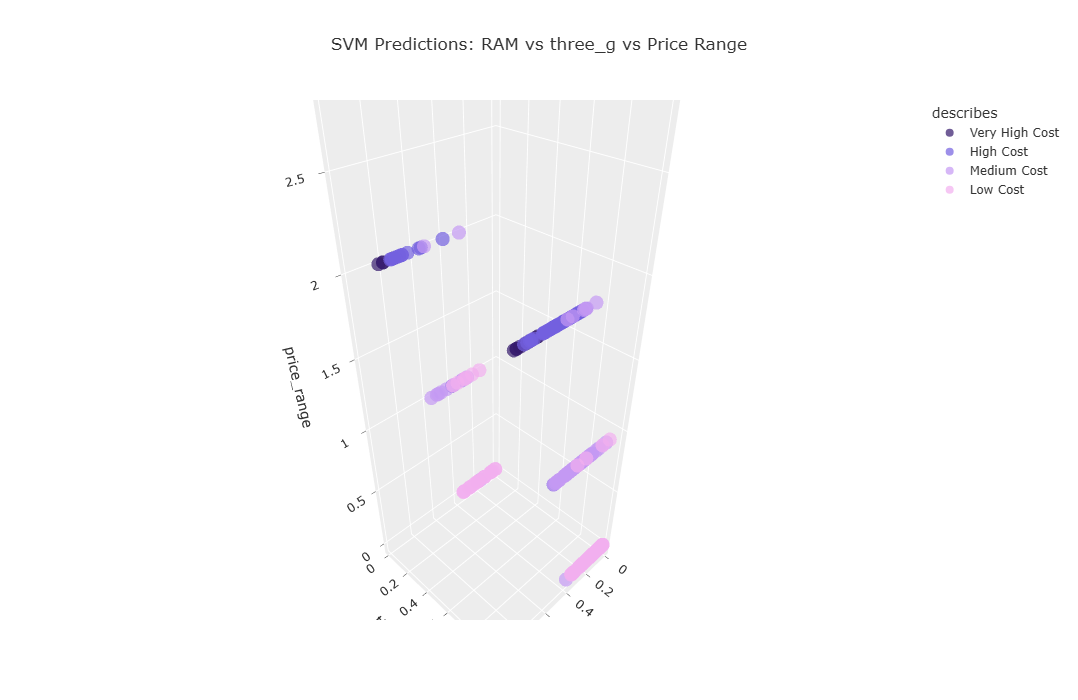

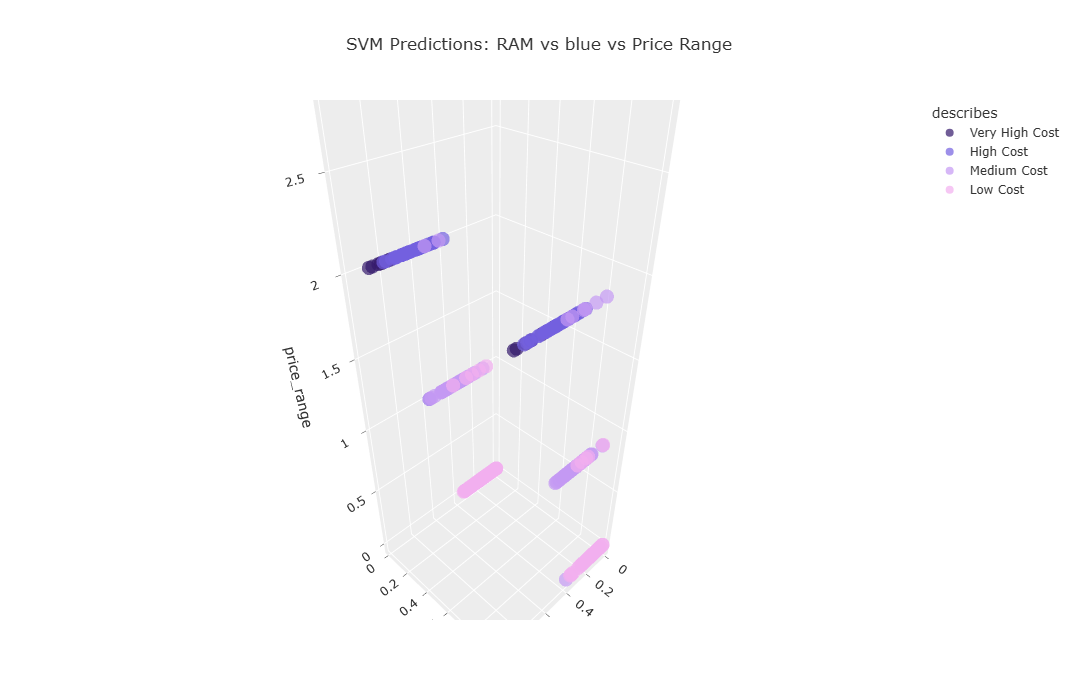

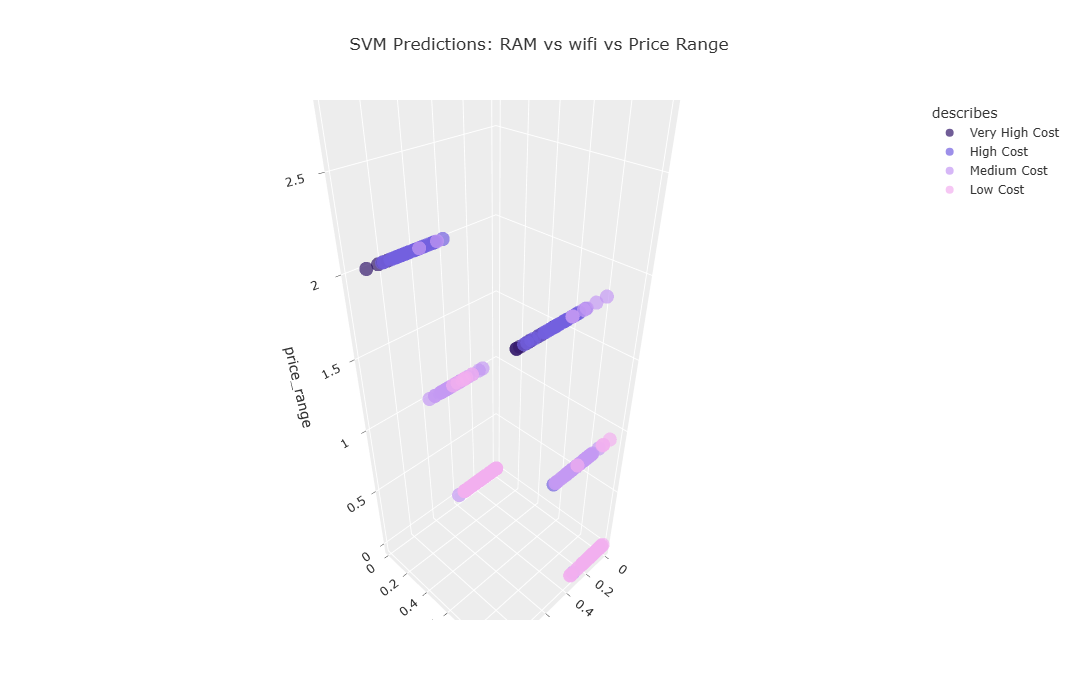

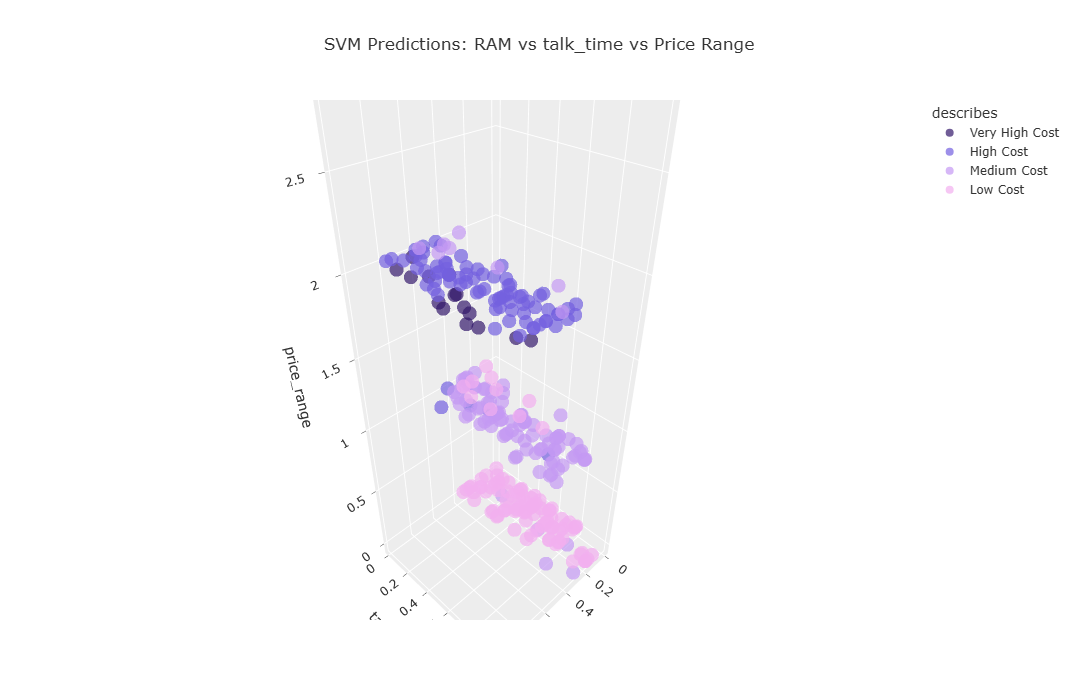

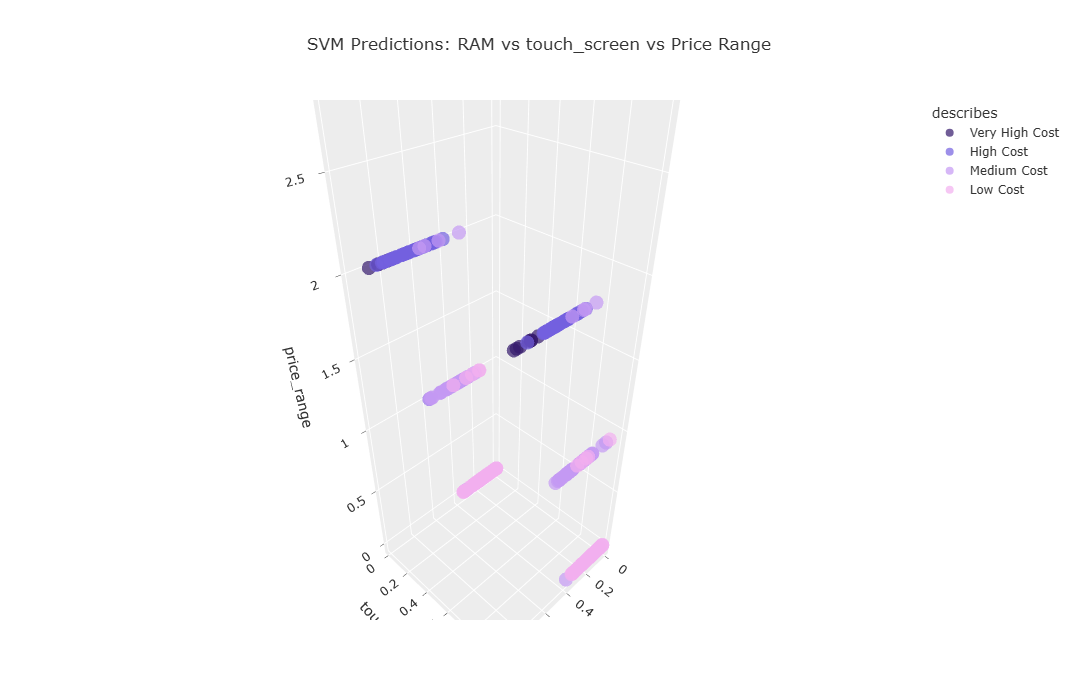

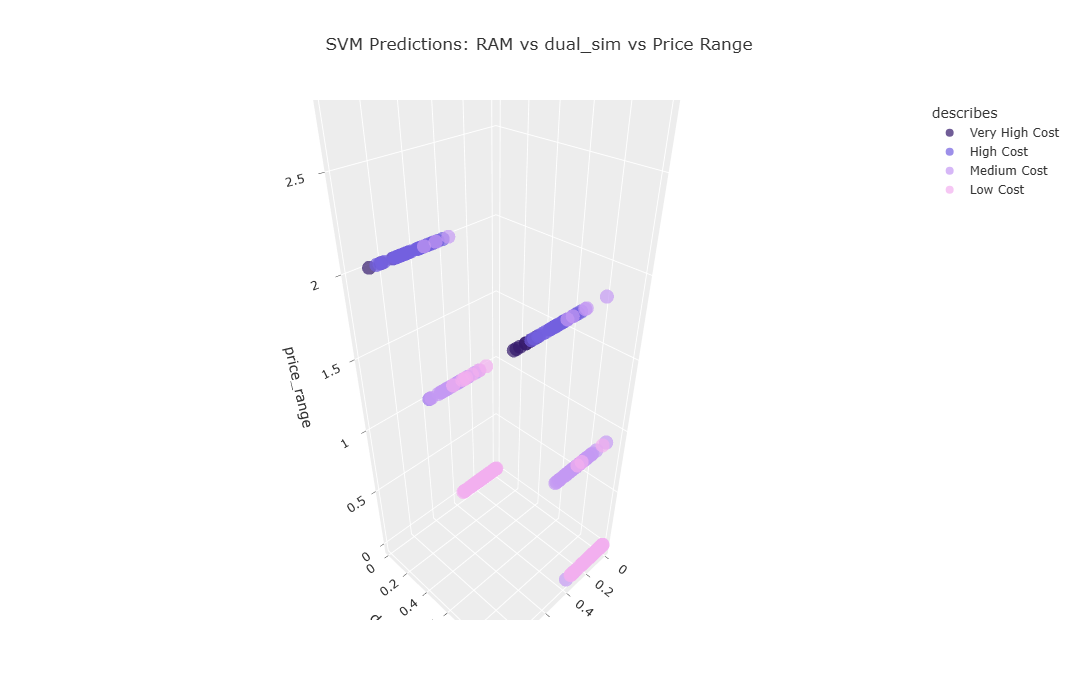

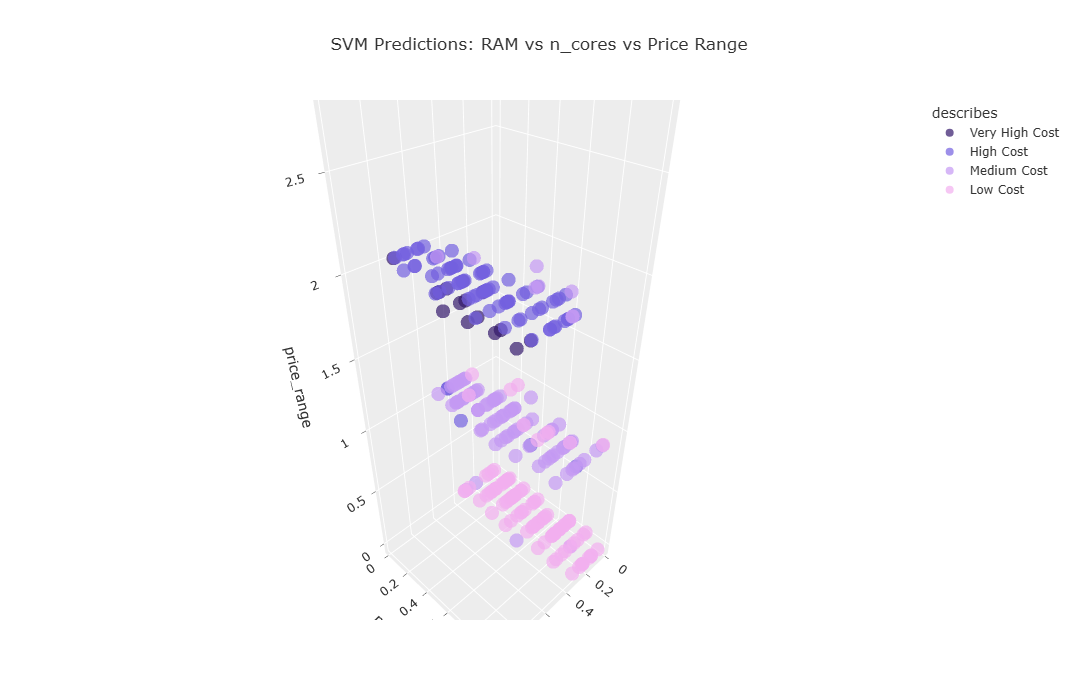

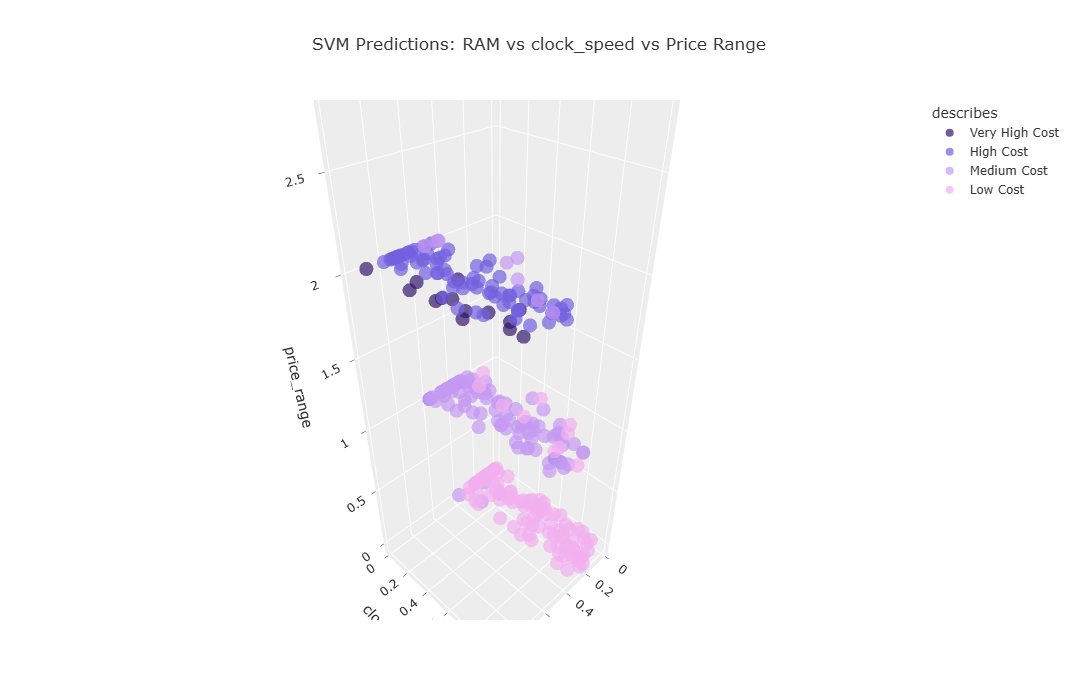

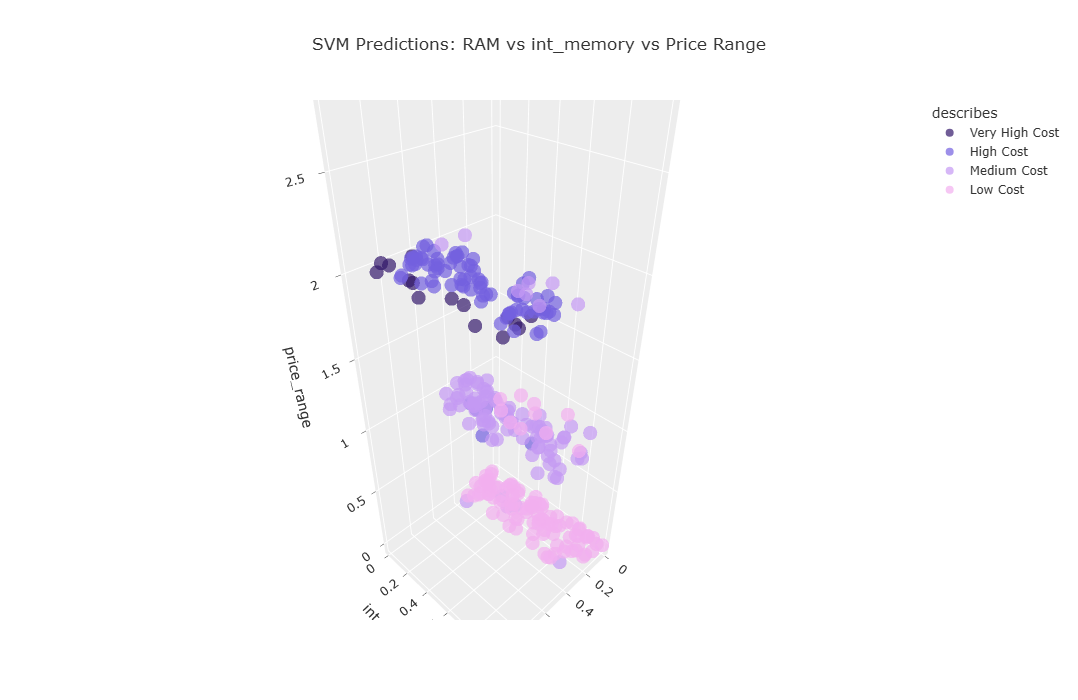

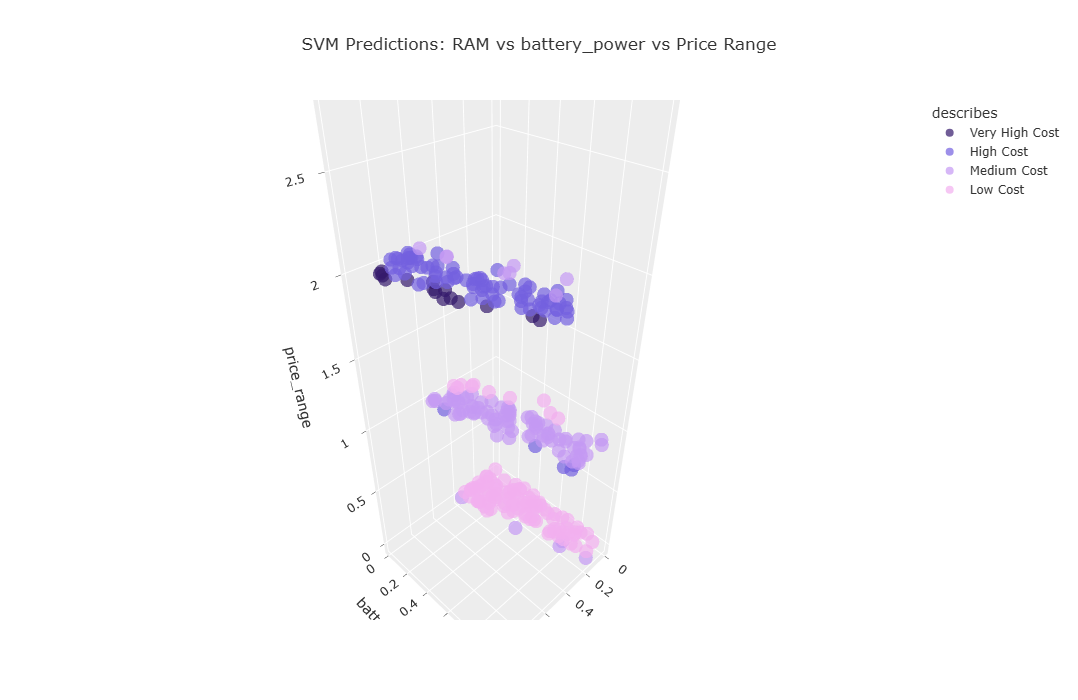

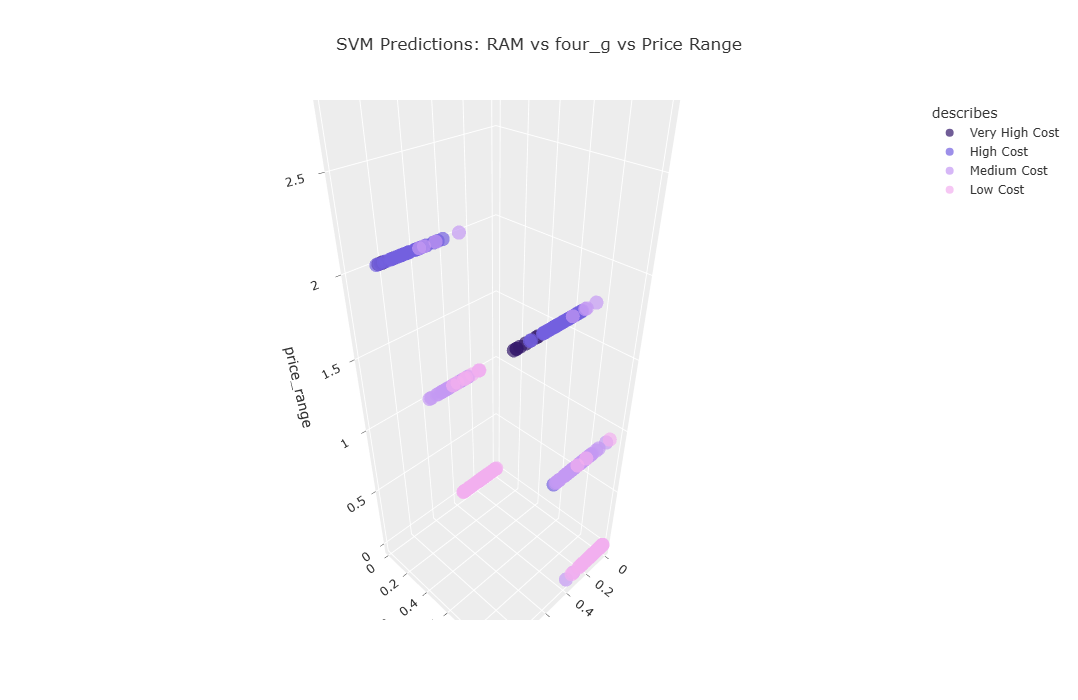

In [60]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0, stratify=y)

# Predicting with best model of SVM that we have already obtained
y_pred_test = best_linear.predict(X_test)
y_pred_train = best_linear.predict(X_train)
# prediction label
X_test = X_test.copy()
X_train = X_train.copy()
X_test['price_range'] = y_test
X_test['Pred'] = y_pred_test
X_train['price_range'] = y_train
X_train['Pred'] = y_pred_train
# mapping numerical to label
label_mapping = {
    0: 'Low Cost',
    1: 'Medium Cost',
    2: 'High Cost',
    3: 'Very High Cost'
}
X_test['describes'] = X_test['Pred'].map(label_mapping)
# i want ram to be baseline axis since it had the most affects
cols = set(X.columns) - {'ram'}
# Loop through features and plot 3D scatter
for col in cols:
    fig = px.scatter_3d(
        data_frame=X_test,
        x=X_test['ram'],
        y=X_test[col],
        z=X_test['price_range'],
        color=X_test['describes'],
        template='ggplot2',
        color_discrete_map={
            'Low Cost': '#F2AFEF',
            'Medium Cost': '#C499F3',
            'High Cost': '#7360DF',
            'Very High Cost': '#33186B'
        },
        opacity=0.7,
        height=700,
        title=f'SVM Predictions: RAM vs {col} vs Price Range'
    )
    pio.show(fig)

<span style="font-size:24px;color:magenta;font-weight:bold"> Predicting New Data Set</span>

In [61]:
df4_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,193,3,16,3476,2,0,1,0
1,841,1,0.5,1,4,1,61,191,5,12,3895,7,1,0,0
2,1807,1,2.8,0,1,0,27,186,3,4,2396,10,0,1,1
3,1546,0,0.5,1,18,1,25,96,8,20,3893,7,1,1,0
4,1434,0,1.4,0,11,1,49,108,6,18,1773,7,1,0,1


In [437]:
feature_cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt', 'pc',
                'ram', 'talk_time', 'blue', 'dual_sim', 'four_g', 'n_cores',
                'three_g', 'touch_screen', 'wifi']

In [62]:
df4_scaled_test=df4_test.copy()
df4_scaled_test[feature_cols]=scaler.fit_transform(df4_scaled_test[feature_cols])
df4_scaled_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi
0,0.362241,1.0,0.52,1.0,0.736842,0.0,0.048387,0.941667,0.285714,0.8,0.862319,0.000000,0.0,1.0,0.0
1,0.227485,1.0,0.00,1.0,0.210526,1.0,0.951613,0.925000,0.571429,0.6,0.974772,0.277778,1.0,0.0,0.0
2,0.871915,1.0,0.92,0.0,0.052632,0.0,0.403226,0.883333,0.285714,0.2,0.572464,0.444444,0.0,1.0,1.0
3,0.697799,0.0,0.00,1.0,0.947368,1.0,0.370968,0.133333,1.000000,1.0,0.974235,0.277778,1.0,1.0,0.0
4,0.623082,0.0,0.36,0.0,0.578947,1.0,0.758065,0.233333,0.714286,0.9,0.405260,0.277778,1.0,0.0,1.0


In [63]:
final_svm=best_linear

In [64]:
final_svm.classes_

array([0, 1, 2, 3], dtype=int64)

In [65]:
# Drop target and any extra columns from features
X = df5_scaled.drop(columns=['price_range', 'Pred'], errors='ignore')
y = df5_scaled['price_range']

X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.900000,0.142857,0.10,0.612774,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.466667,0.285714,0.30,0.634687,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.541667,0.571429,0.30,0.627205,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.425000,0.714286,0.45,0.671566,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.508333,0.142857,0.70,0.308658,0.722222,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.216667,0.714286,0.70,0.110102,0.944444,1.0,1.0,0.0
1994,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.891667,0.428571,0.15,0.474613,0.777778,1.0,1.0,1.0
1995,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.233333,1.000000,0.15,0.748530,0.166667,1.0,1.0,0.0
1996,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.541667,0.571429,0.25,0.163816,0.944444,1.0,1.0,1.0


In [66]:
X_train=X_train.drop(columns=['price_range','Pred'],axis=1)


In [67]:
df4_scaled_test_aligned = df4_scaled_test[feature_names]

In [68]:
preds = final_svm.predict(df4_scaled_test_aligned)

In [69]:
df4_scaled_test_aligned 

,battery_power,clock_speed,fc,int_memory,mobile_wt,pc,ram,talk_time,blue,dual_sim,four_g,n_cores,three_g,touch_screen,wifi
0,0.362241,0.52,0.736842,0.048387,0.941667,0.80,0.862319,0.000000,1.0,1.0,0.0,0.285714,0.0,1.0,0.0
1,0.227485,0.00,0.210526,0.951613,0.925000,0.60,0.974772,0.277778,1.0,1.0,1.0,0.571429,1.0,0.0,0.0
2,0.871915,0.92,0.052632,0.403226,0.883333,0.20,0.572464,0.444444,1.0,0.0,0.0,0.285714,0.0,1.0,1.0
3,0.697799,0.00,0.947368,0.370968,0.133333,1.00,0.974235,0.277778,0.0,1.0,1.0,1.000000,1.0,1.0,0.0
4,0.623082,0.36,0.578947,0.758065,0.233333,0.90,0.405260,0.277778,0.0,0.0,1.0,0.714286,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.800534,0.56,0.000000,0.838710,0.750000,0.85,0.498658,0.722222,1.0,0.0,1.0,0.857143,1.0,1.0,0.0
994,0.072715,0.52,0.000000,0.177419,0.883333,0.10,0.448202,0.944444,0.0,1.0,0.0,0.428571,0.0,1.0,1.0
995,0.456971,0.36,0.052632,0.096774,0.000000,0.60,0.257649,0.666667,0.0,0.0,1.0,0.000000,1.0,0.0,0.0
996,0.689126,0.00,0.000000,0.774194,0.758333,0.60,0.602791,0.222222,1.0,1.0,0.0,0.142857,0.0,1.0,0.0


In [70]:
df4_scaled_test_aligned.insert(len(df4_scaled_test_aligned.columns), 'Price_Range_Prediction', preds)


In [71]:
df4_scaled_test_aligned.head()

,battery_power,clock_speed,fc,int_memory,mobile_wt,pc,ram,talk_time,blue,dual_sim,four_g,n_cores,three_g,touch_screen,wifi,Price_Range_Prediction
0,0.362241,0.52,0.736842,0.048387,0.941667,0.8,0.862319,0.000000,1.0,1.0,0.0,0.285714,0.0,1.0,0.0,3
1,0.227485,0.00,0.210526,0.951613,0.925000,0.6,0.974772,0.277778,1.0,1.0,1.0,0.571429,1.0,0.0,0.0,3
2,0.871915,0.92,0.052632,0.403226,0.883333,0.2,0.572464,0.444444,1.0,0.0,0.0,0.285714,0.0,1.0,1.0,2
3,0.697799,0.00,0.947368,0.370968,0.133333,1.0,0.974235,0.277778,0.0,1.0,1.0,1.000000,1.0,1.0,0.0,3
4,0.623082,0.36,0.578947,0.758065,0.233333,0.9,0.405260,0.277778,0.0,0.0,1.0,0.714286,1.0,0.0,1.0,1


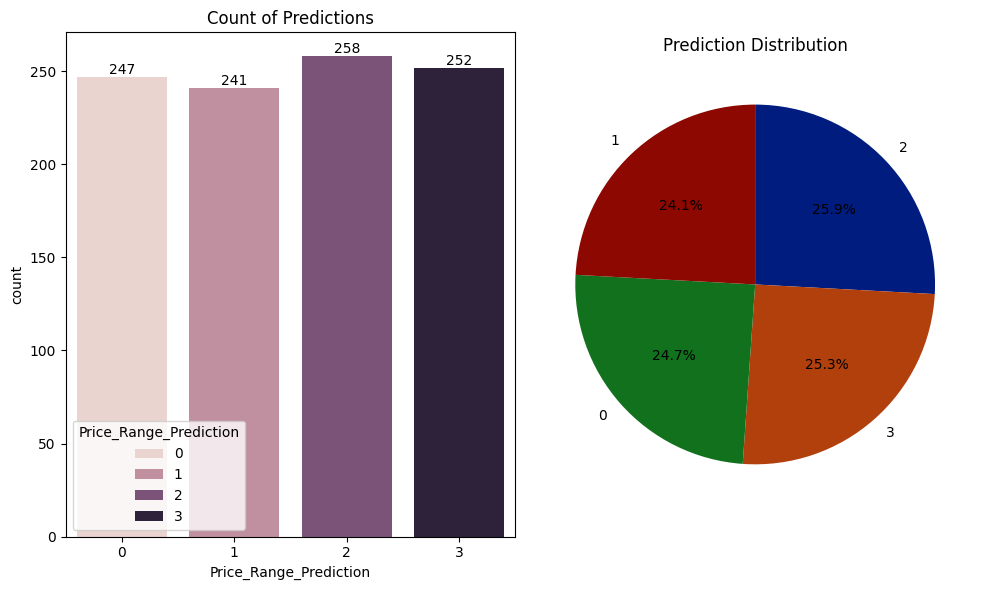

In [72]:
fig,axes=plt.subplots(1,2,figsize=(10,6))
sns.countplot(data=df4_scaled_test_aligned, x='Price_Range_Prediction',hue='Price_Range_Prediction',ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)

axes[0].set_title("Count of Predictions")
counts = df4_scaled_test_aligned['Price_Range_Prediction'].value_counts()
axes[1].pie(counts,labels=counts.index,autopct='%1.1f%%',startangle=90,counterclock=False,colors=sns.color_palette('dark', n_colors=len(counts)))
axes[1].set_title("Prediction Distribution")

plt.tight_layout()
plt.savefig("Figures-Mobile Price/Modelling/Count of Prediction.png", dpi=300, bbox_inches='tight')
plt.show()


Almost evenly distributed

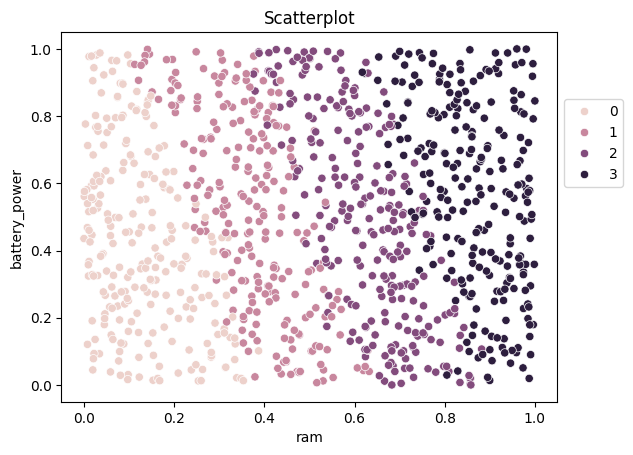

In [73]:
sns.scatterplot(data=df4_scaled_test_aligned, x='ram', y='battery_power', hue='Price_Range_Prediction')
plt.title(f'Scatterplot')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.7))
plt.savefig("Figures-Mobile Price/Modelling/Final Scatterplot.png", dpi=300, bbox_inches='tight')
plt.show()